In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_cases = pd.read_csv("covid_confirmed_usafacts.csv")
data_deaths = pd.read_csv("covid_deaths_usafacts.csv")
#data_usmap = pd.read_csv("./static/data/US_MAP_DATA.csv")

In [3]:
data_deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,13,13,13,13,13,13,13,14,15,15
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,10,10,10,10,10,10,10,11,12,12
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# Function to calculate rate per day
def perday(vin):
    n = vin.shape[0]
    vout = np.zeros(vin.shape)
    vout[0] = vin[0]
    for i in range(1,n):
        vout[i] = vin[i]-vin[i-1]
   
    return vout

In [6]:
# Cases Data Frame
data_cases_by_state = data_cases.groupby(by=['State']).sum()
data_cases_by_state = data_cases_by_state.reset_index()
data_cases_by_state = data_cases_by_state.drop(['countyFIPS' , 'stateFIPS'],axis=1)
list_states = list(data_cases_by_state['State'])
df_tran = pd.DataFrame(columns=['Date','Cases_Sum','State'])
for st in list_states:
    dftemp = data_cases_by_state[data_cases_by_state['State'] == st]
    dftemp = dftemp.drop('State',axis=1)
    dftemp = dftemp.transpose()
    dftemp = dftemp.reset_index()
    dftemp = dftemp.rename(columns ={dftemp.columns[0]:'Date',dftemp.columns[1]:'Cases_Sum'},)
    csum = np.array(dftemp['Cases_Sum'])
    dftemp['Cases_Day'] = perday(csum)
    dftemp['State']=st
    df_tran = df_tran.append(dftemp, sort=False)
  

In [7]:
# Death Data Frame
data_deaths_by_state = data_deaths.groupby(by=['State']).sum()
data_deaths_by_state = data_deaths_by_state.reset_index()
data_deaths_by_state = data_deaths_by_state.drop(['countyFIPS' , 'stateFIPS'],axis=1)
list_states = list(data_deaths_by_state['State'])
df_tran2 = pd.DataFrame(columns=['Date','Deaths_Sum','State'])

for st in list_states:
    dftemp = data_deaths_by_state[data_deaths_by_state['State'] == st]
    dftemp = dftemp.drop('State',axis=1)
    dftemp = dftemp.transpose()
    dftemp = dftemp.reset_index()
    dftemp = dftemp.rename(columns ={dftemp.columns[0]:'Date',dftemp.columns[1]:'Deaths_Sum'},)
    csum = np.array(dftemp['Deaths_Sum'])
    dftemp['Deaths_Day'] = perday(csum)
    dftemp['State']=st
    df_tran2 = df_tran2.append(dftemp, sort=False)

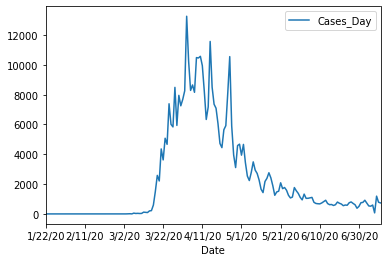

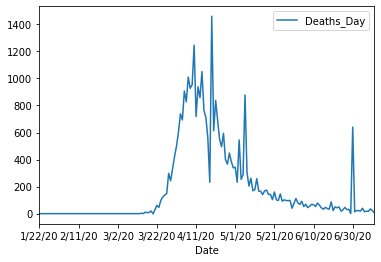

In [8]:
st = 'NY'
df_tran[df_tran['State'] == st].plot(x='Date',y='Cases_Day')
df_tran2[df_tran2['State'] == st].plot(x='Date',y='Deaths_Day')
plt.show()

In [9]:
df_tran2.to_csv('covid_death_proccessed.csv')
df_tran.to_csv('covid_cases_proccessed.csv')